#Pearson Correlation + T-Test

In this notebook, we compute Pearson correlation of human judgements with set of evaluation metrics. 

For human judgements, we took annotations from two distinct set of people and averaged the judgements to counter the issue of subjectivity of opinions. we asked annotators to review given candidate summary on following points. 

1.  Grammatical correctness 
2.  Arrangement/flow of sentences
3.  Text Quality 
4.  Conciseness 
5.  Exhaustiveness 
6.  Overall Score 

From above points, we tried to form a **human evaluation score** in two ways stated below. 

1.  overall score only
2.  weighted average of first five of above stated points. 

Notations: 

Annotations from first set of people:
        
        grammatical_correctness_1
        arrangement_1
        quality_1
        conciseness_1 
        exhaustiveness_1
        subjectiveScore_1

Annotations from second set of people: 

        grammatical_correctness_2
        arrangement_2
        quality_2
        conciseness_2 
        exhaustiveness_2
        subjectiveScore_2

Average of above two sets: 

        grammatical_correctness
        arrangement
        quality
        conciseness 
        exhaustiveness
        subjectiveScore


**List of metrics we computed for measuring correlation with human judgements:**

1.  **R1**:	ROUGE1

2.  **R2**:	ROUGE2

3.  **RL**:	ROUGEL

4.  **CS1**:	sentence-transformers/sentence-t5-xl

5.  **CS2**:	sentence-transformers/sentence-t5-large

6.  **CS3**:	sentence-transformers/multi-qa-MiniLM-L6-cos-v1

7.  **CS4**:	sentence-transformers/distiluse-base-multiling...

8.  **CS5**:	sentence-transformers/paraphrase-MiniLM-L6-v2

9.  **CS6**:	bert-base-uncased

10. **CS7**:	roberta-base, roberta

11. **CS8**:	en_core_web_sm

12. **CS9**:	en_core_web_md

13. **CS10**:	en_core_web_lg

14. **CS11**:	word2vec-google-news-300

15. **CS12**:	glove-twitter-25

16. **BS00**:	bert-base-uncased

17. **BS01**:	bert-large-uncased

18. **BS02**:	bert-base-cased-finetuned-mrpc

19. **BS03**:	roberta-base

20. **BS04**:	roberta-large

21. **BS05**:	roberta-large-mnli

22. **BS06**:	facebook/bart-base

23. **BS07**:	facebook/bart-large

24. **BS08**:	facebook/bart-large-cnn

25. **BS09**:	facebook/bart-large-mnli

26. **BS10**:	facebook/bart-large-xsum

27. **BS11**:	t5-small

28. **BS12**:	t5-base

29. **BS13**:	t5-large

30. **BS14**:	microsoft/deberta-base

31. **BS15**:	microsoft/deberta-base-mnli

32. **BS16**:	microsoft/deberta-large

33. **BS17**:	microsoft/deberta-large-mnli

34. **BS18**:	microsoft/deberta-xlarge

35. **BS19**:	microsoft/deberta-xlarge-mnli

36. **BS20**:	google/pegasus-xsum

At the end, we compute paired T-Test for data significance testing. 




In [ ]:
!pip install --upgrade scipy

     |████████████████████████████████| 38.1 MB 324 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb

# Utility Functions 

In [ ]:
def plot_heatmap(corrs):
    for corr in corrs:
        sb.heatmap(corr, cmap="YlGnBu", annot=True);
        plt.show();

In [ ]:
def plot_hists(annotation_data):
    for df in annotation_data:
        df.plot(kind='hist', subplots=True, figsize=(16,16));
        plt.show()

In [ ]:
def normalize(series):
    min_e, max_e = 1, 5
    return (series - min_e) / (max_e - min_e)

# Data Handling 

1. Reading the CSV File 
2. Seggregation of both sets of annotations
3. Seggregation of evaluation metrics 
4. Min-Max normalization of human judgements 
5. averaging of both sets of judgements 

In [ ]:
# change it according to your settings. 
scores = pd.read_csv('/content/drive/MyDrive/tarang_bertscore/DATA_with_scores.csv').drop(['Unnamed: 0'], axis=1).sort_values(by=['summaryID'])

In [ ]:
annotations_columns = [
  'grammatical_correctness_1', 'arrangement_1', 'quality_1', 'conciseness_1', 'exhaustiveness_1','subjectiveScore_1', 
  'grammatical_correctness_2', 'arrangement_2', 'quality_2', 'conciseness_2', 'exhaustiveness_2','subjectiveScore_2'         
]

target_columns = ['grammatical_correctness', 'arrangement', 'quality', 'conciseness', 'exhaustiveness','subjectiveScore']
annotations_columns_s1, annotations_columns_s2 = annotations_columns[:6], annotations_columns[6:]

In [ ]:
scores_columns = [
    'R1', 'R2', 'RL', 'CS1',
    'CS2', 'CS3', 'CS4', 'CS5', 'CS6', 'CS7', 'CS8', 'CS9', 'CS10', 'CS11',
    'CS12', 'BS00', 'BS01', 'BS02', 'BS03', 'BS04', 'BS05', 'BS06', 'BS07',
    'BS08', 'BS09', 'BS10', 'BS11', 'BS12', 'BS13', 'BS14', 'BS15', 'BS16',
    'BS17', 'BS18', 'BS19', 'BS20'
]

In [ ]:
for col in annotations_columns: 
    scores[col] = normalize(scores[col])

In [ ]:
for s1, s2, target in zip(annotations_columns_s1, annotations_columns_s2, target_columns): 
    scores[target] = (scores[s1] + scores[s2])/2
    print(s1, '-', s2, '-', target)

grammatical_correctness_1 - grammatical_correctness_2 - grammatical_correctness
arrangement_1 - arrangement_2 - arrangement
quality_1 - quality_2 - quality
conciseness_1 - conciseness_2 - conciseness
exhaustiveness_1 - exhaustiveness_2 - exhaustiveness
subjectiveScore_1 - subjectiveScore_2 - subjectiveScore


# Histogram of both sets 

observation: There's very little disagreement between both the sets. 

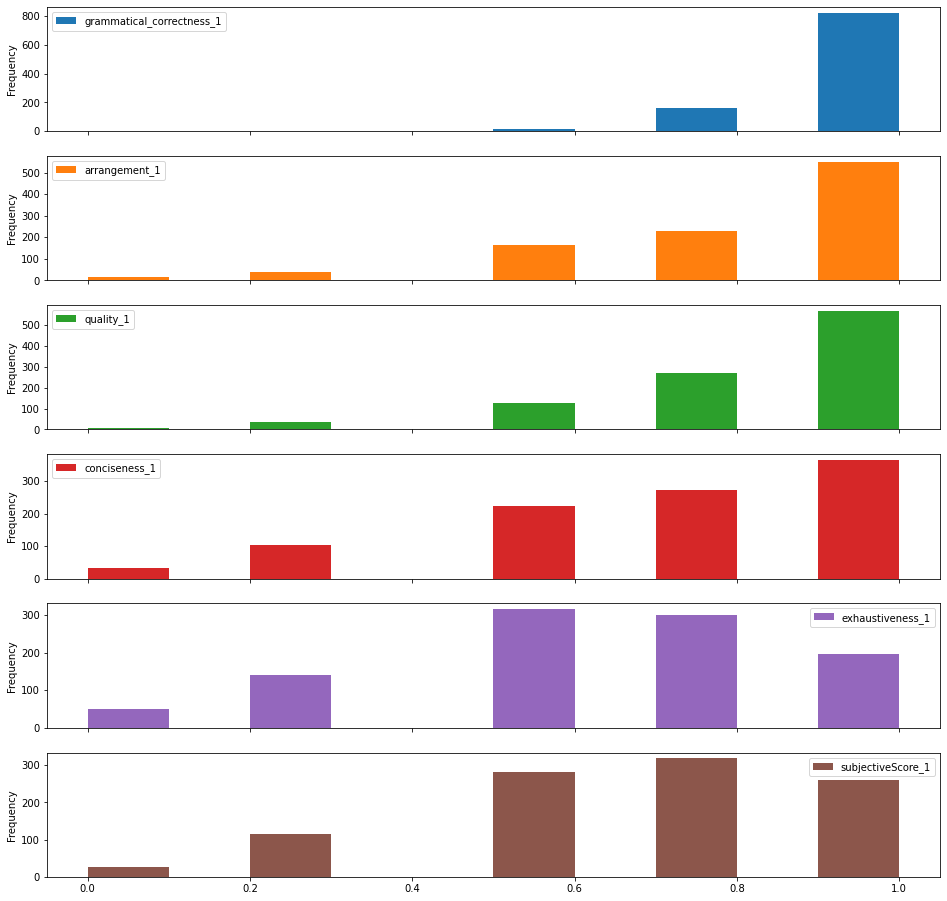

In [ ]:
plot_hists([scores[annotations_columns_s1]])

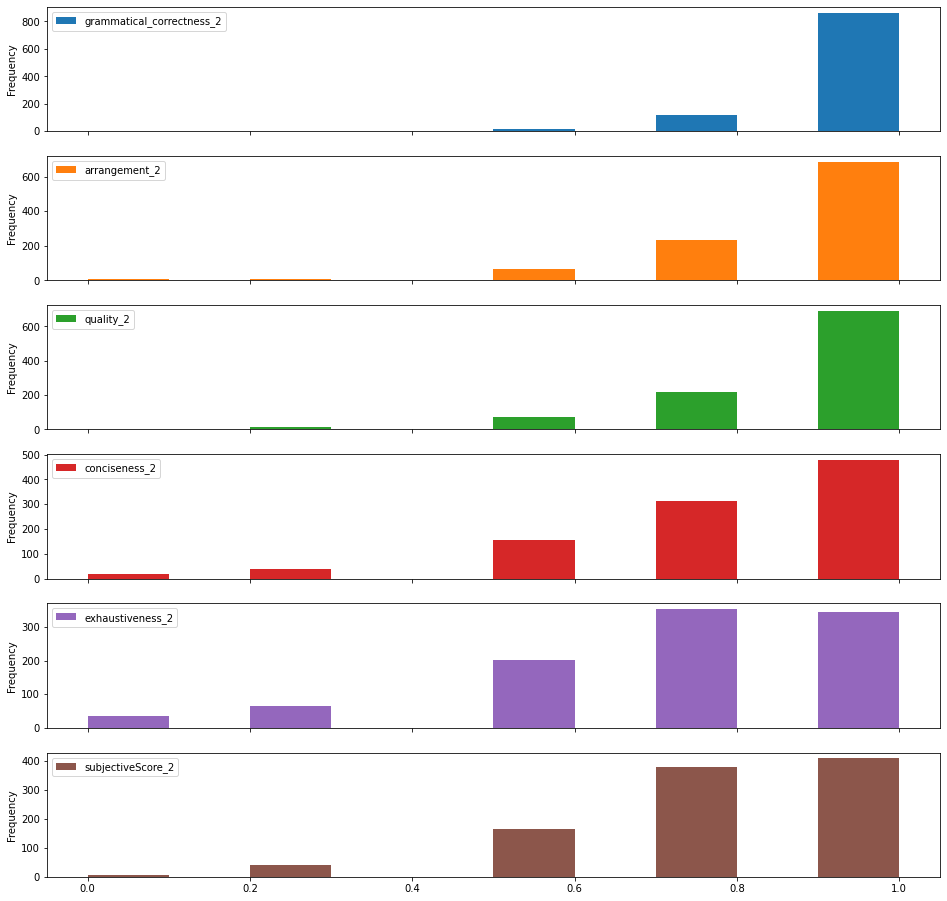

In [ ]:
plot_hists([scores[annotations_columns_s2]])

# Correlation of human judgement points 

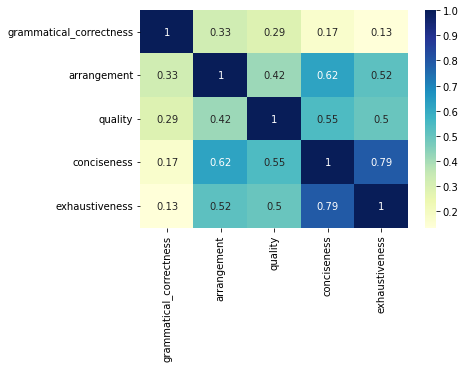

In [ ]:
avg_corr = scores.loc[:, target_columns[:-1]].corr(method='pearson')
plot_heatmap([avg_corr])

# Deriving weights 

our idea is that we want to form a score from grammatical_correctness, arrangement, quality, conciseness, and exhaustiveness. 

we summed up the rows of correlation metrics and performed softmax over it to derive weights. our idea behind doing this was that we wanted to give higher weight to the column having higher correlation with other columns.  

In [ ]:
corr_sum = avg_corr.sum()
weights = np.exp(corr_sum) / np.sum(np.exp(corr_sum))
weights

grammatical_correctness    0.082849
arrangement                0.217474
quality                    0.190170
conciseness                0.278851
exhaustiveness             0.230656
dtype: float64

# Comparing scores distribution of both the sets. 

here, we compare score distribution of both the sets after applying weights. 

**observation**: There's very little disagreement between both the sets. 

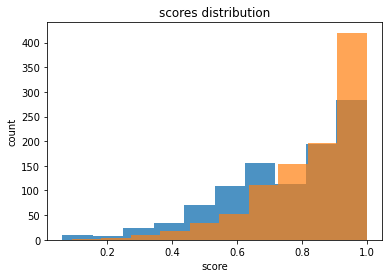

In [ ]:
s1_data = scores.loc[:, annotations_columns_s1[:-1]]
s1_data = s1_data.rename(columns = dict(zip(annotations_columns_s1[:-1], target_columns[:-1])))
weighted_sums_in = [weights @ s1_data.iloc[i, :] for i in range(s1_data.shape[0])]
plt.hist(weighted_sums_in, alpha=0.8);
plt.xlabel("score");
plt.ylabel("count");
plt.title("scores distribution")

s2_data = scores.loc[:, annotations_columns_s2[:-1]]
s2_data = s2_data.rename(columns = dict(zip(annotations_columns_s2[:-1], target_columns[:-1])))
weighted_sums_out = [weights @ s2_data.iloc[i, :] for i in range(s2_data.shape[0])]
plt.hist(weighted_sums_out, alpha=0.7);
plt.xlabel("score");
plt.ylabel("count");

In [ ]:
scores['human_evaluation_score'] = (scores.loc[:, target_columns[:-1]] * weights).sum(axis=1)

# Correlation of human judgements with set of evaluation metrics. 

observe last two rows/columns of correlation matrix to check the correlation of human judgements with set of metrics. 

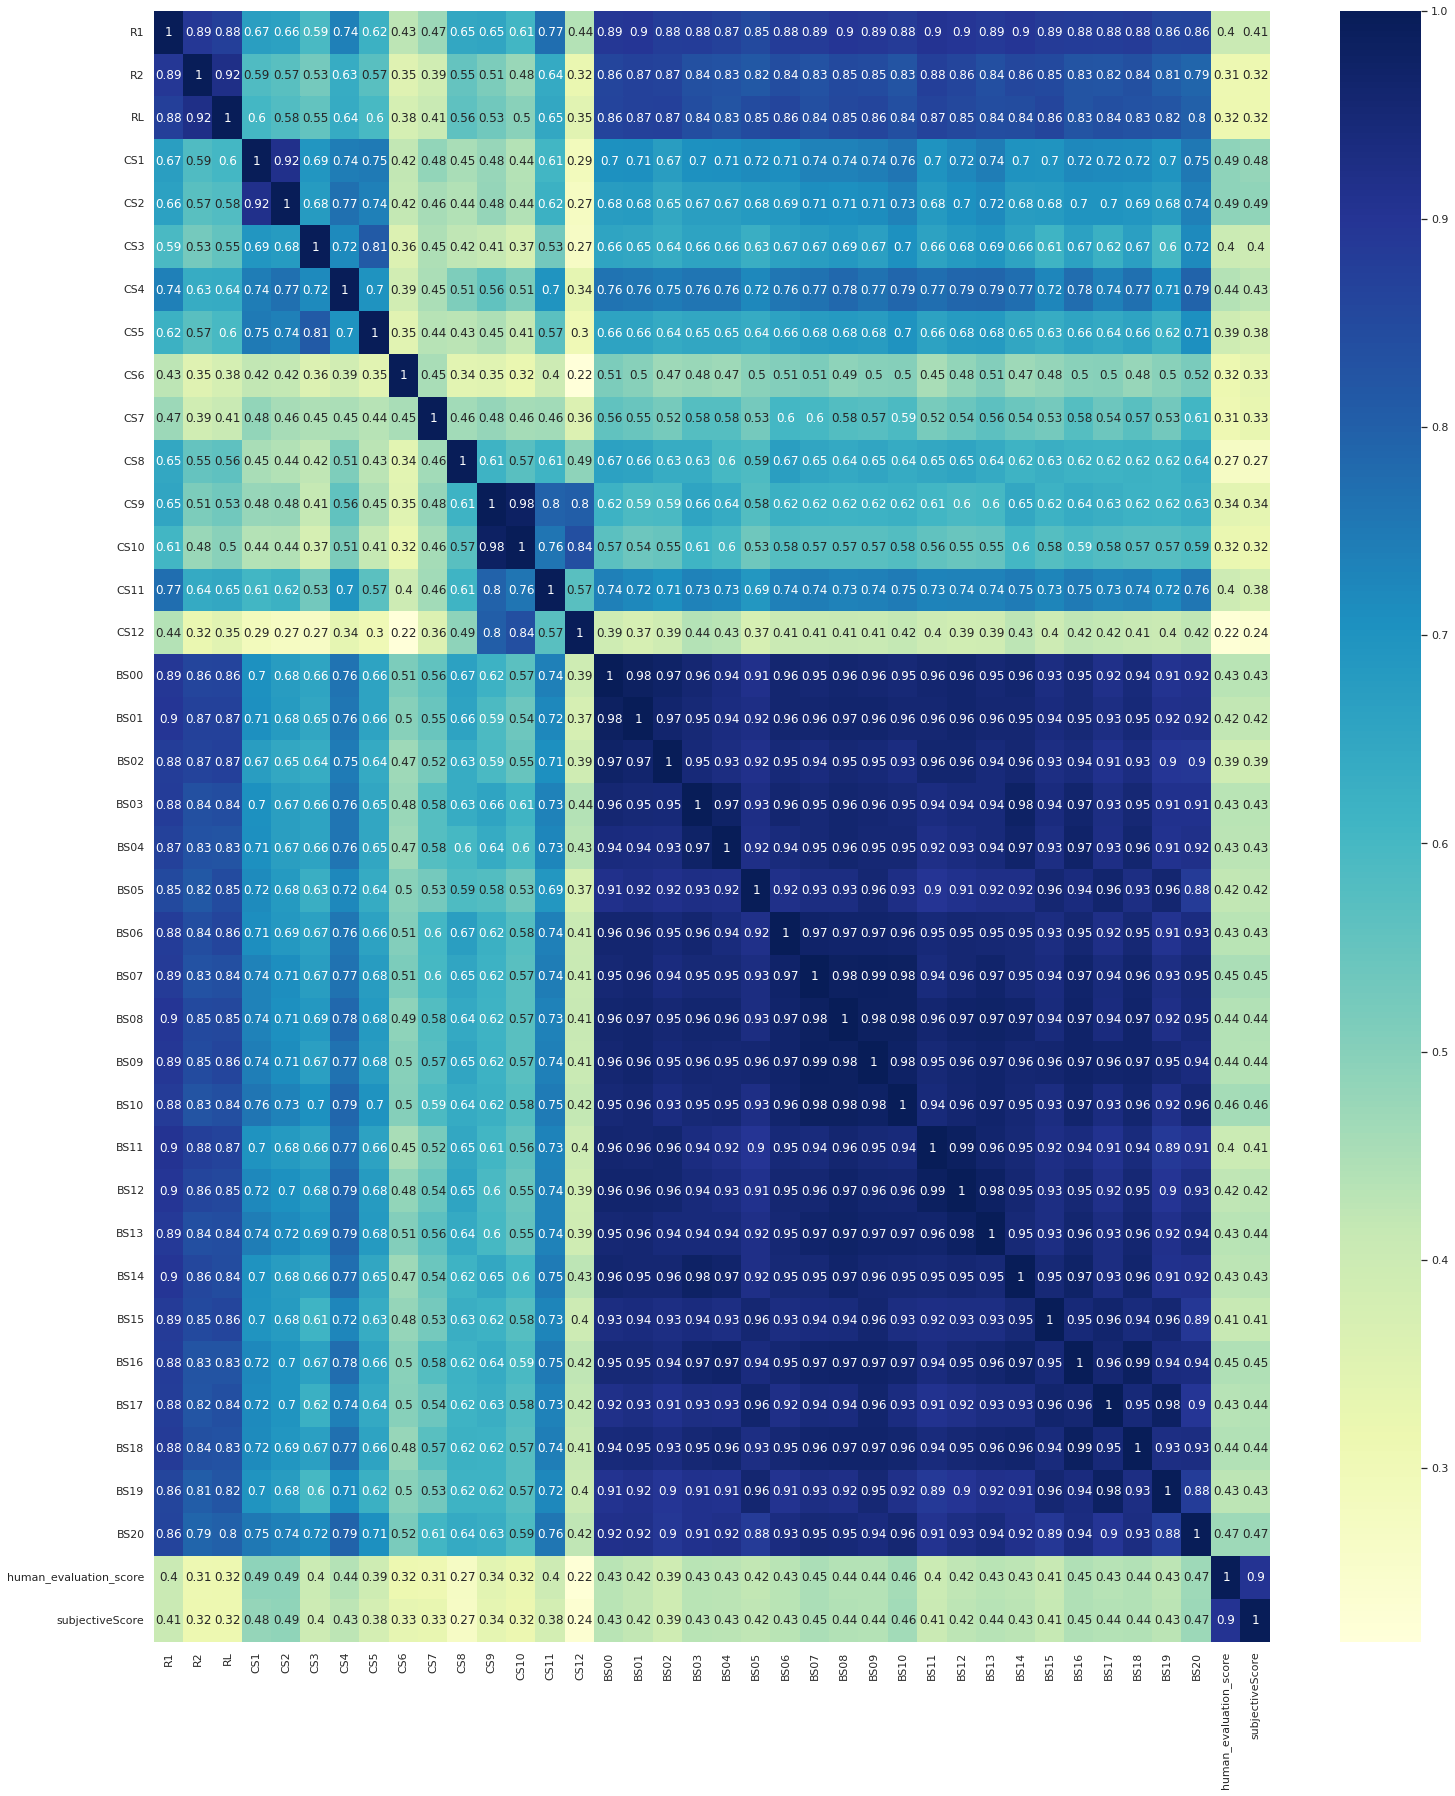

In [ ]:
sb.set(rc = {'figure.figsize':(25,30)})
final_corr = scores.loc[:, scores_columns + ['human_evaluation_score', 'subjectiveScore']].corr(method='pearson')
plot_heatmap([final_corr])

In [ ]:
final_corr.loc[:, ['human_evaluation_score',	'subjectiveScore']]

,human_evaluation_score,subjectiveScore
R1,0.403563,0.405817
R2,0.312113,0.316820
RL,0.316603,0.316652
CS1,0.489912,0.481815
CS2,0.490389,0.488624
CS3,0.402207,0.397415
CS4,0.439674,0.426063
CS5,0.394660,0.379361
CS6,0.316681,0.333384
CS7,0.311063,0.327259


#TTEST

If we observe a large p-value, for example greater than 0.05 or 0.1 then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages. Small p-values are associated with large t-statistics.

here we have performed set of t-test between 2 ways of deriving human judgements and set of evaluation metrics. 

if 2 ways of human judgments are denoted has H1 and H2
and set of evaluation metrics are denoted as E1, E2, ..., EN. 

Null Hypothesis:

    For Hi in [H1, H2]{ 

        For Ei in [E1, E2, ..., EN]{

            Hi and Ei are same

        }

    }

 


**Threshold = 1%**

In [ ]:
from scipy import stats

In [ ]:
sample = scores.sample(n=20)

In [ ]:
annotation_result_columns = ['human_evaluation_score',	'subjectiveScore']

In [ ]:
ttest_res = dict()
ttest_acceptance = dict()
threshold = 0.01
for annoatation_column in annotation_result_columns:
    res = []
    acceptance = []
    for column in scores_columns: 
        col1 = sample[column].to_numpy()
        col2 = sample[annoatation_column].to_numpy()
        pvalue = stats.ttest_rel(col2, col1, alternative='two-sided').pvalue
        res.append(pvalue)
        acceptance.append('Rejected' if pvalue <= threshold else 'Accepted')
    
    ttest_res[annoatation_column] = res
    ttest_acceptance[annoatation_column] = acceptance

In [ ]:
pd.DataFrame(ttest_res, index=scores_columns)

,human_evaluation_score,subjectiveScore
R1,6.016916e-12,4.099283e-08
R2,1.785166e-13,1.746276e-10
RL,2.026535e-12,4.005306e-09
CS1,1.097688e-02,5.510728e-04
CS2,3.864515e-03,2.511722e-04
CS3,1.352335e-02,9.441133e-01
CS4,1.716099e-04,1.816900e-01
CS5,3.328166e-03,5.230348e-01
CS6,1.327134e-01,3.610751e-03
CS7,3.303392e-06,1.881493e-06


In [ ]:
pd.DataFrame(ttest_acceptance, index=scores_columns)

,human_evaluation_score,subjectiveScore
R1,Rejected,Rejected
R2,Rejected,Rejected
RL,Rejected,Rejected
CS1,Accepted,Rejected
CS2,Rejected,Rejected
CS3,Accepted,Accepted
CS4,Rejected,Accepted
CS5,Rejected,Accepted
CS6,Accepted,Rejected
CS7,Rejected,Rejected
